### Bag_Of_Words Models

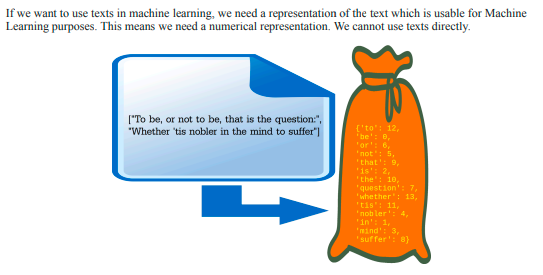

In [1]:
corpus = ["To be, or not to be, that is the question:",
         "Whether this nobler in the mind to suffer",
         "The slings and arrows of outrageous fortune,"]

In [2]:
from sklearn.feature_extraction import text

In [3]:
vectorizer = text.CountVectorizer()
print(vectorizer)

CountVectorizer()


In [4]:
vectorizer.fit(corpus)

CountVectorizer()

In [5]:
print("Vocabulary:", vectorizer.vocabulary_)

Vocabulary: {'to': 18, 'be': 2, 'or': 10, 'not': 8, 'that': 15, 'is': 5, 'the': 16, 'question': 12, 'whether': 19, 'this': 17, 'nobler': 7, 'in': 4, 'mind': 6, 'suffer': 14, 'slings': 13, 'and': 0, 'arrows': 1, 'of': 9, 'outrageous': 11, 'fortune': 3}


If you only want to see the words without the indices, you can your the method feature_names :

In [7]:
print(vectorizer.vocabulary_.keys())

dict_keys(['to', 'be', 'or', 'not', 'that', 'is', 'the', 'question', 'whether', 'this', 'nobler', 'in', 'mind', 'suffer', 'slings', 'and', 'arrows', 'of', 'outrageous', 'fortune'])


With the aid of transform we will extract the token counts out of the raw text documents. The call will
use the vocabulary which we created with fit :


In [8]:
token_count_matrix = vectorizer.transform(corpus)
print(token_count_matrix)

  (0, 2)	2
  (0, 5)	1
  (0, 8)	1
  (0, 10)	1
  (0, 12)	1
  (0, 15)	1
  (0, 16)	1
  (0, 18)	2
  (1, 4)	1
  (1, 6)	1
  (1, 7)	1
  (1, 14)	1
  (1, 16)	1
  (1, 17)	1
  (1, 18)	1
  (1, 19)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 9)	1
  (2, 11)	1
  (2, 13)	1
  (2, 16)	1


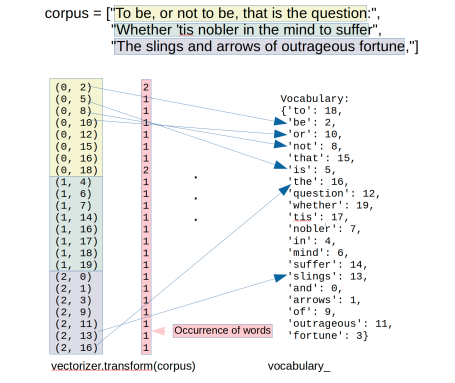

In [9]:
dense_tcm = token_count_matrix.toarray()
dense_tcm

array([[0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]],
      dtype=int64)

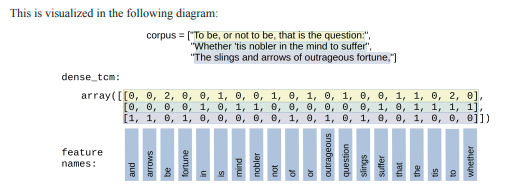

In [10]:
feature_names = vectorizer.get_feature_names_out()
for el in vectorizer.vocabulary_:
    print(el)

to
be
or
not
that
is
the
question
whether
this
nobler
in
mind
suffer
slings
and
arrows
of
outrageous
fortune


In [11]:
import pandas as pd
pd.DataFrame(data=dense_tcm,
            index=['corpus_0','corpus_1','corpus_2'],
            columns = vectorizer.get_feature_names_out())

,and,arrows,be,fortune,in,is,mind,nobler,not,of,or,outrageous,question,slings,suffer,that,the,this,to,whether
corpus_0,0,0,2,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,2,0
corpus_1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,1
corpus_2,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0


In [12]:
word = "be"
i =1
j = vectorizer.vocabulary_[word]
print("number of time '"+ word + "' occurs in:")
for i in range(len(corpus)):
    print(" '"+ corpus[i] + "': "+ str(dense_tcm[i][j]))

number of time 'be' occurs in:
 'To be, or not to be, that is the question:': 2
 'Whether this nobler in the mind to suffer': 0
 'The slings and arrows of outrageous fortune,': 0


In [13]:
j

2

In [14]:
txt = "That is the question and it is nobler in the mind."
vectorizer.transform([txt]).toarray()

array([[1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0]],
      dtype=int64)

In [15]:
print(vectorizer.get_feature_names_out())

['and' 'arrows' 'be' 'fortune' 'in' 'is' 'mind' 'nobler' 'not' 'of' 'or'
 'outrageous' 'question' 'slings' 'suffer' 'that' 'the' 'this' 'to'
 'whether']


In [16]:
print(vectorizer.vocabulary_)

{'to': 18, 'be': 2, 'or': 10, 'not': 8, 'that': 15, 'is': 5, 'the': 16, 'question': 12, 'whether': 19, 'this': 17, 'nobler': 7, 'in': 4, 'mind': 6, 'suffer': 14, 'slings': 13, 'and': 0, 'arrows': 1, 'of': 9, 'outrageous': 11, 'fortune': 3}


### Word Importance

In [17]:
from sklearn.feature_extraction import text
corpus = ["It does not matter you are doing, just do it!",
         "Would you work if you won the lottery?",
         "You like Python, he likes Python, we like Python, every body loves Pythons!",
         "You said: 'I wish I were a Python Programmer'",
         "You can stay here, if you want to. I would, if you want to. I would, if I were you."]

In [18]:
vectorizer = text.CountVectorizer()
vectorizer.fit(corpus)

CountVectorizer()

In [19]:
token_count_matrix = vectorizer.transform(corpus)
print(token_count_matrix)

  (0, 0)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 10)	2
  (0, 11)	1
  (0, 16)	1
  (0, 17)	1
  (0, 32)	1
  (1, 9)	1
  (1, 14)	1
  (1, 23)	1
  (1, 29)	1
  (1, 30)	1
  (1, 31)	1
  (1, 32)	2
  (2, 1)	1
  (2, 6)	1
  (2, 7)	1
  (2, 12)	2
  (2, 13)	1
  (2, 15)	1
  (2, 19)	3
  (2, 20)	1
  (2, 26)	1
  (2, 32)	1
  (3, 18)	1
  (3, 19)	1
  (3, 21)	1
  (3, 27)	1
  (3, 28)	1
  (3, 32)	1
  (4, 2)	1
  (4, 8)	1
  (4, 9)	3
  (4, 22)	1
  (4, 24)	2
  (4, 25)	2
  (4, 27)	1
  (4, 31)	2
  (4, 32)	4


In [22]:
tf_idf = text.TfidfTransformer()
tf_idf.fit(token_count_matrix)

tf_idf.idf_

array([2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 1.69314718,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 1.69314718,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 1.69314718, 2.09861229, 2.09861229,
       2.09861229, 1.69314718, 1.        ])

In [24]:
tf_idf.idf_[vectorizer.vocabulary_["python"]]

1.6931471805599454

In [25]:
da = vectorizer.transform(corpus).toarray()
i = 0

# check how often the word "would" occures in the i'th sentece:
word_ind = vectorizer.vocabulary_['would']
da[i][word_ind]
da[:,word_ind]

array([0, 1, 0, 0, 2], dtype=int64)

In [26]:
word_weight_list = list(zip(vectorizer.get_feature_names_out(),tf_idf.idf_))

word_weight_list.sort(key=lambda x:x[1])
for word, idf_weight in word_weight_list:
    print(f"{word:15s}: {idf_weight:4.3f}")

you            : 1.000
if             : 1.693
python         : 1.693
were           : 1.693
would          : 1.693
are            : 2.099
body           : 2.099
can            : 2.099
do             : 2.099
does           : 2.099
doing          : 2.099
every          : 2.099
he             : 2.099
here           : 2.099
it             : 2.099
just           : 2.099
like           : 2.099
likes          : 2.099
lottery        : 2.099
loves          : 2.099
matter         : 2.099
not            : 2.099
programmer     : 2.099
pythons        : 2.099
said           : 2.099
stay           : 2.099
the            : 2.099
to             : 2.099
want           : 2.099
we             : 2.099
wish           : 2.099
won            : 2.099
work           : 2.099


In [27]:
from numpy import log
from sklearn.feature_extraction import text

corpus = ["It does not matter what you are doing, just do it!",
         "Would you work if you won the lottery?",
         "You like Python, he likes python, we like Python, everybody loves Python!",
         "You said: 'I wish I were a Python programmer'",
         "You can stay here, if you want to. I would, if I were you."]
n = len(corpus)
n

5

In [29]:
#The following variable are used globally (as free variable) in the function

vectorizer = text.CountVectorizer()
vectorizer.fit(corpus)
da = vectorizer.transform(corpus).toarray()
da

array([[1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 2],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 4, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 3]], dtype=int64)

### Term Frequency

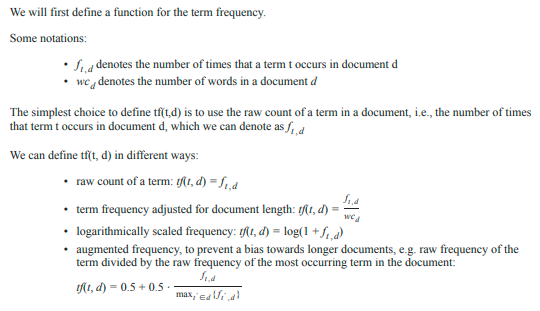

In [31]:
def tf(t, d, mode="raw"):
    #The term frequency tf calculate how often a term 't'
    #occurs in a document 'd'. ('d': document index)
    #If t_in_d = Number of times a term t apears in a document t d
    #and no_term_d = Total number of terms in the document,
    #tf(t,d) = t_in_d / no_term_d
    
    if t in vectorizer.vocabulary_:
        word_ind = vectorizer.vocabulary_[t]
        t_occurences = da[d, word_ind]
    else:
        t_occurences = 0
        
    if mode =="raw":
        result = t_occurences
        
    elif mode =="length":
        all_terms = (da[d] > 0).sum()
        result = t_occurences /all_terms
    elif mode == "log":
        result = log(1 + t_occurences)
    elif mode =="augfreq":
        result = 0.5 + 0.5 * t_occurences / da[d].max()
        
    return result

In [32]:
print("   raw     length    log    augmentedfreq")
for term in ['matter','python','would']:
    for docu_index in range(len(corpus)):
        d = corpus[docu_index]
        print(f"\n'{term}' in '{d}'")
        for mode in ['raw','length','log','augfreq']:
            x = tf(term, docu_index, mode=mode)
            print(f"{x:7.2f}",end="")

   raw     length    log    augmentedfreq

'matter' in 'It does not matter what you are doing, just do it!'
   1.00   0.10   0.69   0.75
'matter' in 'Would you work if you won the lottery?'
   0.00   0.00   0.00   0.50
'matter' in 'You like Python, he likes python, we like Python, everybody loves Python!'
   0.00   0.00   0.00   0.50
'matter' in 'You said: 'I wish I were a Python programmer''
   0.00   0.00   0.00   0.50
'matter' in 'You can stay here, if you want to. I would, if I were you.'
   0.00   0.00   0.00   0.50
'python' in 'It does not matter what you are doing, just do it!'
   0.00   0.00   0.00   0.50
'python' in 'Would you work if you won the lottery?'
   0.00   0.00   0.00   0.50
'python' in 'You like Python, he likes python, we like Python, everybody loves Python!'
   4.00   0.50   1.61   1.00
'python' in 'You said: 'I wish I were a Python programmer''
   1.00   0.17   0.69   1.00
'python' in 'You can stay here, if you want to. I would, if I were you.'
   0.00   0.00   0

### Document Frequency

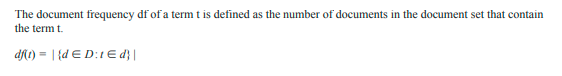

### Inverse Document Frequency

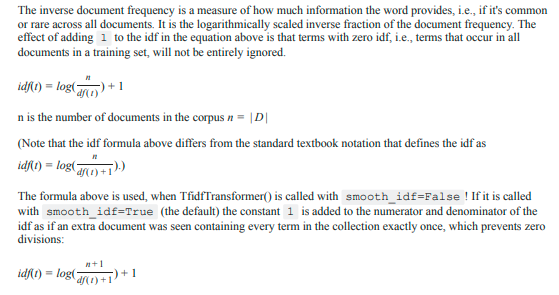

### Term Frequency-Inverse Document Frequency

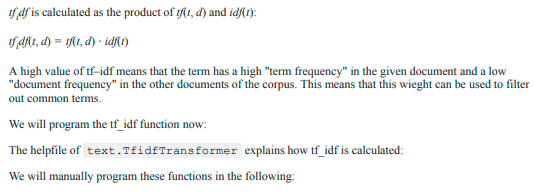

In [33]:
def df(t):
    #df(t) is the document frequency of t; the document frequency is
    # the number of document in the document set that contain the term t.
    
    word_ind = vectorizer.vocabulary_[t]
    tf_in_docus = da[:, word_ind]# vector with the frequencies of word_ind in all docus
    existence_in_docus = tf_in_docus > 0 # binary vector, existence of word in docus
    return existence_in_docus.sum()

def idf(t, smooth_idf=True):
    if smooth_idf:
        return log((1 + n) / (1 + df(t))) + 1 
    else:
        return log(n / df(t)) + 1
    
    
def tf_idf(t,d):
    return idf(t) * tf(t, d)

res_idf = []
for word in vectorizer.get_feature_names_out():
    tf_docus = []
    res_idf.append([word, idf(word)])
    
res_idf.sort(key= lambda x:x[1])
for item in res_idf:
    print(item)

['you', 1.0]
['if', 1.6931471805599454]
['python', 1.6931471805599454]
['were', 1.6931471805599454]
['would', 1.6931471805599454]
['are', 2.09861228866811]
['can', 2.09861228866811]
['do', 2.09861228866811]
['does', 2.09861228866811]
['doing', 2.09861228866811]
['everybody', 2.09861228866811]
['he', 2.09861228866811]
['here', 2.09861228866811]
['it', 2.09861228866811]
['just', 2.09861228866811]
['like', 2.09861228866811]
['likes', 2.09861228866811]
['lottery', 2.09861228866811]
['loves', 2.09861228866811]
['matter', 2.09861228866811]
['not', 2.09861228866811]
['programmer', 2.09861228866811]
['said', 2.09861228866811]
['stay', 2.09861228866811]
['the', 2.09861228866811]
['to', 2.09861228866811]
['want', 2.09861228866811]
['we', 2.09861228866811]
['what', 2.09861228866811]
['wish', 2.09861228866811]
['won', 2.09861228866811]
['work', 2.09861228866811]


In [34]:
corpus

['It does not matter what you are doing, just do it!',
 'Would you work if you won the lottery?',
 'You like Python, he likes python, we like Python, everybody loves Python!',
 "You said: 'I wish I were a Python programmer'",
 'You can stay here, if you want to. I would, if I were you.']

In [35]:
for word, word_index in vectorizer.vocabulary_.items():
    print(f"\n{word:12s}: ",end="")
    for d_index in range(len(corpus)):
        print(f"{d_index:1d} {tf_idf(word, d_index):3.2f}, ",end="")


it          : 0 4.20, 1 0.00, 2 0.00, 3 0.00, 4 0.00, 
does        : 0 2.10, 1 0.00, 2 0.00, 3 0.00, 4 0.00, 
not         : 0 2.10, 1 0.00, 2 0.00, 3 0.00, 4 0.00, 
matter      : 0 2.10, 1 0.00, 2 0.00, 3 0.00, 4 0.00, 
what        : 0 2.10, 1 0.00, 2 0.00, 3 0.00, 4 0.00, 
you         : 0 1.00, 1 2.00, 2 1.00, 3 1.00, 4 3.00, 
are         : 0 2.10, 1 0.00, 2 0.00, 3 0.00, 4 0.00, 
doing       : 0 2.10, 1 0.00, 2 0.00, 3 0.00, 4 0.00, 
just        : 0 2.10, 1 0.00, 2 0.00, 3 0.00, 4 0.00, 
do          : 0 2.10, 1 0.00, 2 0.00, 3 0.00, 4 0.00, 
would       : 0 0.00, 1 1.69, 2 0.00, 3 0.00, 4 1.69, 
work        : 0 0.00, 1 2.10, 2 0.00, 3 0.00, 4 0.00, 
if          : 0 0.00, 1 1.69, 2 0.00, 3 0.00, 4 3.39, 
won         : 0 0.00, 1 2.10, 2 0.00, 3 0.00, 4 0.00, 
the         : 0 0.00, 1 2.10, 2 0.00, 3 0.00, 4 0.00, 
lottery     : 0 0.00, 1 2.10, 2 0.00, 3 0.00, 4 0.00, 
like        : 0 0.00, 1 0.00, 2 4.20, 3 0.00, 4 0.00, 
python      : 0 0.00, 1 0.00, 2 6.77, 3 1.69, 4 0.00, 
he       